# Análisis Exploratorio de Datos - EDA

In [4]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Cargar los datos con los que se va a trabajar
df = pd.read_csv('homicidios_completo.csv', index_col=0)
df

,ID,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de Calle,...,Comuna,XY (CABA),Pos x,Pos y,Participantes,Acusado,Rol,Víctima,Sexo,EDAD
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,CARGAS,CONDUCTOR,MOTO,MASCULINO,27
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,CARGAS,CONDUCTOR,AUTO,MASCULINO,60


Aquí se realizarán algunas visualizaciónes de medidas, que luego podrán ser exploradas a mayor profundidad en el dashboard debido a la interactividad de la herramienta

### Distribucion temporal de las víctimas

#### Número total de víctimas fatales por año

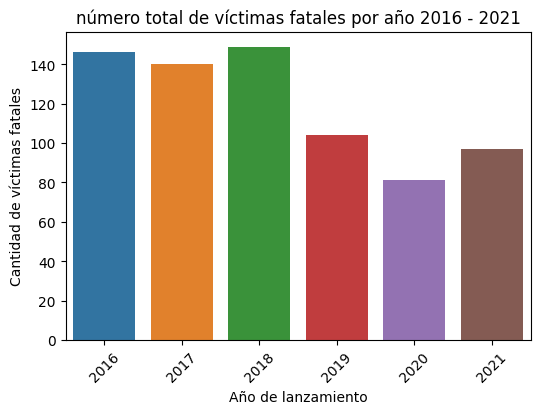

In [9]:
plt.style.use('fast')
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = "Año")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas fatales')
plt.xlabel('Año de lanzamiento')
plt.title('Número total de víctimas fatales por año 2016 - 2021')
plt.show()

Como era de esperarse, el año con menos víctimas es el 2020, debido a los confinamientos por Covid 19

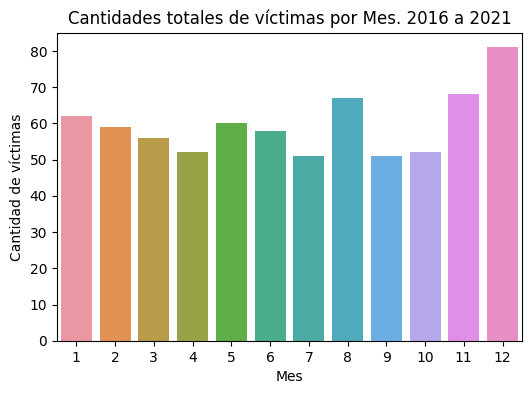

In [29]:
# Distribución de víctimas por mes
mes = df.groupby('Mes').agg({'Cantidad víctimas':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Mes', y='Cantidad víctimas', data=mes)
ax.set_title('Cantidades totales de víctimas por Mes. 2016 a 2021')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

Distribución de víctimas a lo largo de cada año, mes a mes:

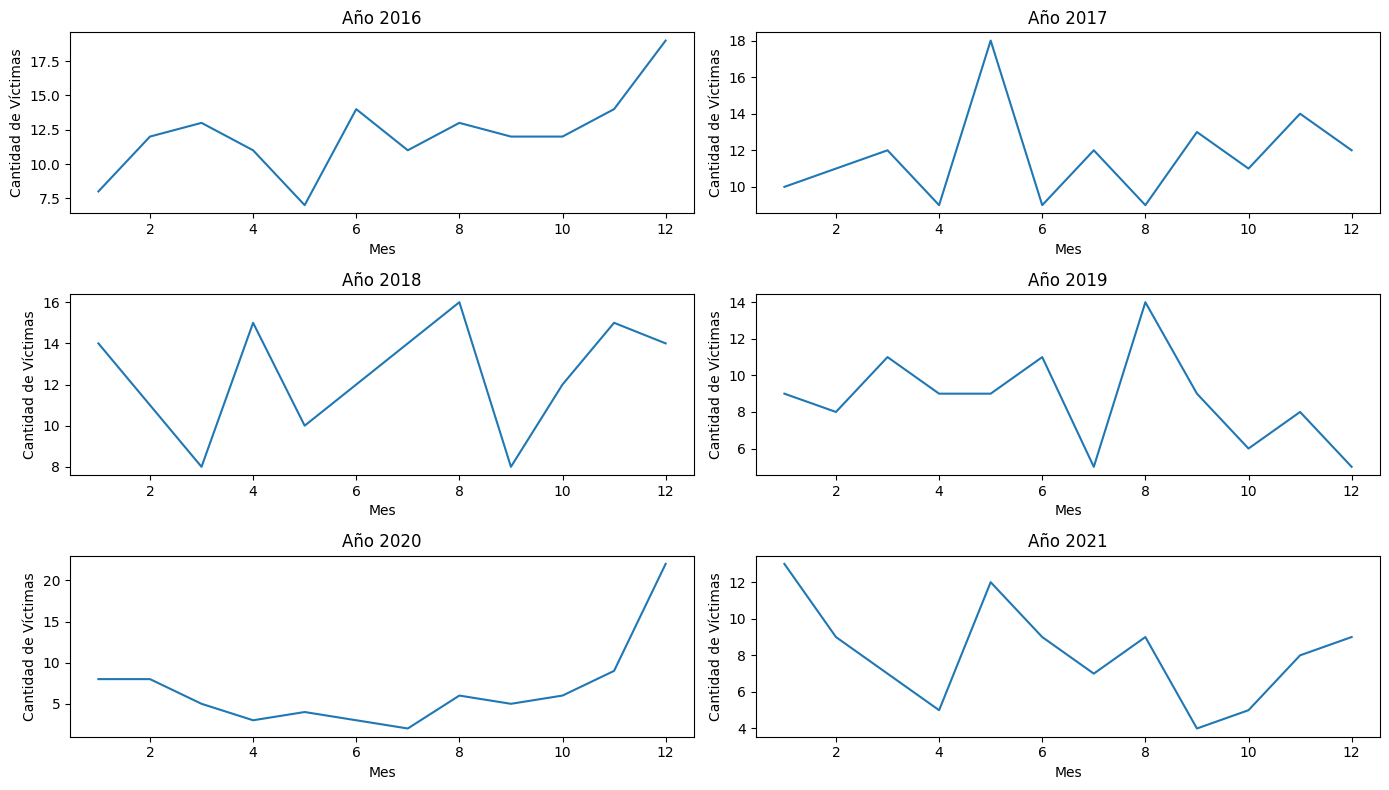

In [32]:
#gráfica con subplots por año, para comparar tendencias
anios = df['Año'].unique()

n_filas = 3
n_columnas = 2
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(14, 8))

for i, year in enumerate(anios):
    fila = i // n_columnas
    columna = i % n_columnas
    data_mensual = (df[df['Año'] == year].groupby('Mes').agg({'Cantidad víctimas':'count'}))
        
     # Se configura el subgráfico actual
    ax = axes[fila, columna]
    data_mensual.plot(ax=ax, kind='line')
    ax.set_title('Año ' + str(year)) ; ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')
    ax.legend_ = None
        
    # Se muestra y acomoda el gráfico
plt.tight_layout()
plt.show()

Es interesante observar que no parece existir un patrón relacionado con la accidentalidad según los meses del año.

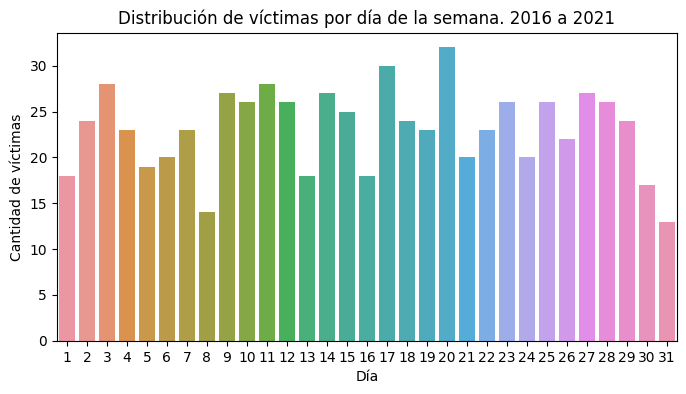

In [33]:
#Distribución de víctimas por día de la semana
dia = df.groupby('Día').agg({'Cantidad víctimas':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Día', y='Cantidad víctimas', data=dia)
ax.set_title('Distribución de víctimas por día de la semana. 2016 a 2021')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

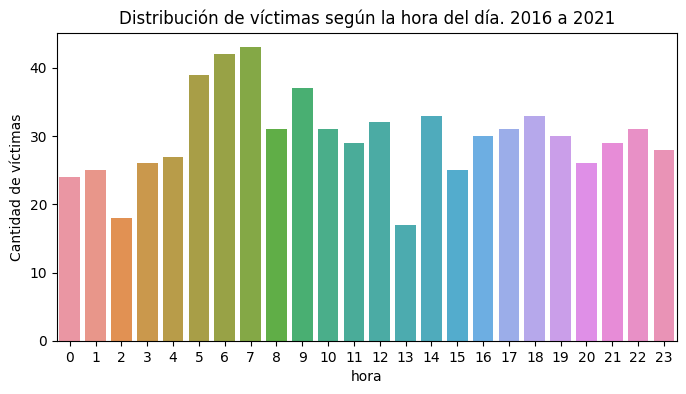

In [34]:
#Distribución de accidentes fatales según la hora del día
hora = df.groupby('Hora entera').agg({'Cantidad víctimas':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Hora entera', y='Cantidad víctimas', data=hora)
ax.set_title('Distribución de víctimas según la hora del día. 2016 a 2021')
ax.set_xlabel('hora') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

#### Distribución demográfica de las víctimas.

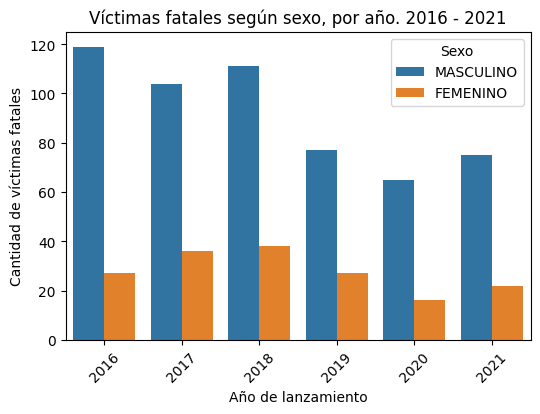

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = "Año", hue='Sexo')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas fatales')
plt.xlabel('Año de lanzamiento')
plt.title('Víctimas fatales según sexo, por año. 2016 - 2021')
plt.show()

#### Distribución de víctimas por edades

Según tipo de usuario
según usuraio por sexo
según usuario por edad
según usuario por vehículo
según usuario por rol (conductor, pasajero, etc)


Según tipos de vehículos

Según comunas
según tipo de vía
según cruce / no cruce

NOTA PARA MI:

Trabajar los KPI.

El domingo trabajar sobre EDA, mediciones y el dash board y el lunes sobre la presentación, el Reademe y el StoryTelling.
